In [ ]:
!pip install sentence_transformers
!pip install transformers --quiet

## cats


In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -q annotations_trainval2014

--2021-12-10 10:33:58--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.68.68
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.68.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  53.3MB/s    in 4.6s    

2021-12-10 10:34:03 (52.5 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [ ]:
import json
from IPython.display import Image


with open("./annotations/instances_val2014.json", "r") as read_file:
    js = json.loads(read_file.read())

In [ ]:
print(json.dumps(js['categories']))

[{"supercategory": "person", "id": 1, "name": "person"}, {"supercategory": "vehicle", "id": 2, "name": "bicycle"}, {"supercategory": "vehicle", "id": 3, "name": "car"}, {"supercategory": "vehicle", "id": 4, "name": "motorcycle"}, {"supercategory": "vehicle", "id": 5, "name": "airplane"}, {"supercategory": "vehicle", "id": 6, "name": "bus"}, {"supercategory": "vehicle", "id": 7, "name": "train"}, {"supercategory": "vehicle", "id": 8, "name": "truck"}, {"supercategory": "vehicle", "id": 9, "name": "boat"}, {"supercategory": "outdoor", "id": 10, "name": "traffic light"}, {"supercategory": "outdoor", "id": 11, "name": "fire hydrant"}, {"supercategory": "outdoor", "id": 13, "name": "stop sign"}, {"supercategory": "outdoor", "id": 14, "name": "parking meter"}, {"supercategory": "outdoor", "id": 15, "name": "bench"}, {"supercategory": "animal", "id": 16, "name": "bird"}, {"supercategory": "animal", "id": 17, "name": "cat"}, {"supercategory": "animal", "id": 18, "name": "dog"}, {"supercategory

In [ ]:
js.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [ ]:
len(js['annotations'])

291875

In [ ]:
js['annotations'][0]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [ ]:
img2cat = dict()
for an in js['annotations']:
    img2cat[str(an['image_id'])] = an['category_id']

In [ ]:
js['categories']

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [ ]:
cat2super = dict()
for c in js['categories']:
    cat2super[c['id']] = c['supercategory']

In [ ]:
len(cat2super)

80

## Resnet Embeddings

In [ ]:
import pickle

with open('res_GB.txt', 'rb') as fin:
    lines = pickle.loads(fin.read())
for l in lines:
    print(l, lines[l])
    break

COCO_val2014_000000201111.jpg 0.9918330825704371


## Metrics

In [ ]:
from sentence_transformers import SentenceTransformer
import ast
import pandas as pd
from scipy import spatial


def cosine(model, sentences):
    embs = model.encode(sentences)
    return 1 - spatial.distance.cosine(embs[0], embs[1])

def get_ans(filename):
    cnt = 0
    all_ = []
    ans = []
    with open(filename, 'r') as fin:
        info_ = fin.read().strip().split('\n')
    print(len(info_))
    for i in info_:
        name = i.split(' [[')[0]
        try:
            tmp = ast.literal_eval('[[' + i.split(' [[')[-1])
        except:
            pass
            #print(tmp)
        for t in tmp:
            try:
                all_.append([name] + t)# + [img2cat[str(int(name[-7:]))]])
            except:
                print(name)
            ans.append(t[-1][0])
            ans.append(t[-1][1])
        #for a in range(len(tmp)):
            #ans = tmp[a][-1]
            #if cosine(model, ans) <= 40:
                #cnt += 1
    df = pd.DataFrame(all_)
    #df.head()
    #print(len(ans), df.shape)
    return ans, df

In [ ]:
ans, df = get_ans('log_GB.txt')

40503


In [ ]:
df.head()

,0,1,2,3
0,COCO_val2014_000000262148,Where is he looking?,"{'at table': 0.3, 'down': 1, 'skateboard': 0.3...","(down, down)"
1,COCO_val2014_000000262148,What are the people in the background doing?,{'watching': 1},"(watching, watching)"
2,COCO_val2014_000000262148,What is he on top of?,"{'picnic table': 1, 'skateboard': 0.3, 'table'...","(picnic table, ramp)"
3,COCO_val2014_000000393225,Is this a creamy soup?,{'no': 1},"(yes, no)"
4,COCO_val2014_000000393225,Is this rice noodle soup?,{'yes': 1},"(yes, yes)"


In [ ]:
len(ans)

420102

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-MiniLM-L6-v2').to('cuda')

In [ ]:
cosine_m = []
for i in range(0, len(ans), 512):
    sentences = ans[i:i+512]
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        encoded_input = encoded_input.to('cuda')
        model_output = model(**encoded_input)

    # Perform pooling. In this case, max pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    embs = sentence_embeddings.cpu()

    for j in range(0, len(embs), 2):
        cosine_m.append(1 - spatial.distance.cosine(embs[j], embs[j+1]))

df['cosine'] = cosine_m

In [ ]:
df.head(10)

,0,1,2,3,cosine
0,COCO_val2014_000000262148,Where is he looking?,"{'at table': 0.3, 'down': 1, 'skateboard': 0.3...","(down, down)",1.000000
1,COCO_val2014_000000262148,What are the people in the background doing?,{'watching': 1},"(watching, watching)",1.000000
2,COCO_val2014_000000262148,What is he on top of?,"{'picnic table': 1, 'skateboard': 0.3, 'table'...","(picnic table, ramp)",0.002678
3,COCO_val2014_000000393225,Is this a creamy soup?,{'no': 1},"(yes, no)",0.341078
4,COCO_val2014_000000393225,Is this rice noodle soup?,{'yes': 1},"(yes, yes)",1.000000
5,COCO_val2014_000000393225,What is to the right of the soup?,"{'chopsticks': 1, 'shrimp': 0.3}","(toothbrush, toothbrush)",1.000000
6,COCO_val2014_000000393226,What is the man doing in the street?,"{'crossing': 0.9, 'walking': 1}","(walking, walking)",1.000000
7,COCO_val2014_000000393226,How many photo's can you see?,"{'1': 1, '4': 1}","(2, 1)",0.800115
8,COCO_val2014_000000393226,What does the truck on the left sell?,{'ice cream': 1},"(ice cream, ice cream)",1.000000
9,COCO_val2014_000000240301,Why is there a gap between the roof and wall?,"{'air': 0.3, 'yes': 0.6}","(yes, yes)",1.000000


In [ ]:
emb_score = []
for n in df.loc[:, 0]:
    if n + '.jpg' in lines:
        emb_score.append(lines[n + '.jpg'])
    else:
        emb_score.append(0)

df['emb_score'] = emb_score

In [ ]:
categs = []
for n in df.loc[:, 0]:
    k = str(int(n[-6:]))
    if k in img2cat:
        categs.append(img2cat[k])
    else:
        categs.append(0)

df['cat'] = categs

In [ ]:
scs = []
for c in categs:
    if c == 0:
        scs.append(0)
    else:
        scs.append(cat2super[c])

df['super'] = scs

In [ ]:
df = df[df['emb_score'] != 0]

In [ ]:
df.head(50)

,0,1,2,3,cosine,emb_score,cat,super
0,COCO_val2014_000000262148,Where is he looking?,"{'at table': 0.3, 'down': 1, 'skateboard': 0.3...","(down, down)",1.000000,0.995119,1,person
1,COCO_val2014_000000262148,What are the people in the background doing?,{'watching': 1},"(watching, watching)",1.000000,0.995119,1,person
2,COCO_val2014_000000262148,What is he on top of?,"{'picnic table': 1, 'skateboard': 0.3, 'table'...","(picnic table, ramp)",0.002678,0.995119,1,person
3,COCO_val2014_000000393225,Is this a creamy soup?,{'no': 1},"(yes, no)",0.341078,0.997479,50,kitchen
4,COCO_val2014_000000393225,Is this rice noodle soup?,{'yes': 1},"(yes, yes)",1.000000,0.997479,50,kitchen
5,COCO_val2014_000000393225,What is to the right of the soup?,"{'chopsticks': 1, 'shrimp': 0.3}","(toothbrush, toothbrush)",1.000000,0.997479,50,kitchen
6,COCO_val2014_000000393226,What is the man doing in the street?,"{'crossing': 0.9, 'walking': 1}","(walking, walking)",1.000000,0.993341,3,vehicle
7,COCO_val2014_000000393226,How many photo's can you see?,"{'1': 1, '4': 1}","(2, 1)",0.800115,0.993341,3,vehicle
8,COCO_val2014_000000393226,What does the truck on the left sell?,{'ice cream': 1},"(ice cream, ice cream)",1.000000,0.993341,3,vehicle
9,COCO_val2014_000000240301,Why is there a gap between the roof and wall?,"{'air': 0.3, 'yes': 0.6}","(yes, yes)",1.000000,0.998912,21,animal


In [ ]:
df.groupby(by='super').mean()

,cosine,emb_score,cat
super,,,
0,0.835453,0.992091,0.000000
accessory,0.847653,0.993347,30.184780
animal,0.870112,0.990212,20.829302
appliance,0.861681,0.995234,80.414297
electronic,0.853448,0.994550,74.661928
food,0.797806,0.994367,56.694793
furniture,0.844823,0.994423,65.048871
indoor,0.850236,0.994368,85.511158
kitchen,0.834542,0.994792,47.388204


In [ ]:
df[df['super'] == 'food'].head(50)

,0,1,2,3,cosine,emb_score,cat,super
257,COCO_val2014_000000240323,Is there meat on this plate?,"{'turkey': 0.9, 'yes': 1}","(yes, yes)",1.000000,0.997433,57,food
258,COCO_val2014_000000240323,Is this a vegetarian meal?,"{'no': 1, 'yes': 1}","(yes, no)",0.341078,0.997433,57,food
259,COCO_val2014_000000240323,What is the green fruit called?,{'avocado': 1},"(lime, lemon)",0.571728,0.997433,57,food
381,COCO_val2014_000000131282,Is all the food on the plate vegetables?,{'yes': 1},"(no, no)",1.000000,0.994166,57,food
382,COCO_val2014_000000131282,Does she eat with the right hand?,{'yes': 1},"(no, no)",1.000000,0.994166,57,food
383,COCO_val2014_000000131282,What color is the sauce?,{'green': 1},"(white, red)",0.260006,0.994166,57,food
384,COCO_val2014_000000131282,Has the food this woman is preparing been fried?,{'no': 1},"(no, no)",1.000000,0.994166,57,food
817,COCO_val2014_000000000428,What is around the baby's neck?,{'tie': 1},"(bowtie, bow)",0.818527,0.994030,61,food
818,COCO_val2014_000000000428,Is he going to need a bath soon?,{'yes': 1},"(no, no)",1.000000,0.994030,61,food
819,COCO_val2014_000000000428,What color are the balloons?,{'white': 1},"(white, blue)",0.290978,0.994030,61,food


In [ ]:
df.groupby(by='cat').mean().tail(50)

,cosine,emb_score
cat,,
35,0.889018,0.993376
36,0.903853,0.991891
37,0.875277,0.992032
38,0.863533,0.995439
39,0.864028,0.992315
40,0.852359,0.993134
41,0.864273,0.992489
42,0.861159,0.991792
43,0.886902,0.993952


In [ ]:
df.shape

(209649, 8)

In [ ]:
df[df['emb_score'] <= 0.999].shape[0] / df.shape[0]

0.9442496744558763

In [ ]:
df[df['cosine'] <= 0.81].shape[0] / df.shape[0]

0.36116079733268464

In [ ]:
tmp = df[(df['emb_score'] <= 0.999) & (df['emb_score'] > 0.997)]
print("{0:.05f}".format(tmp['cosine'].mean()), "{0:.05f}".format(tmp['cosine'].min()), "{0:.05f}".format(tmp['cosine'].max()), sep=', ')

0.85492, -0.18879, 1.00000


для дождя

<= 0.95   0.69898, -0.14934, 1.00000\
<= 0.97   0.70131, -0.17554, 1.00000\
<= 0.98   0.68967, -0.18879, 1.00000\
<= 0.985  0.69048, -0.18879, 1.00000\
<= 0.99   0.68857, -0.21350, 1.00000\
<= 0.992  0.68223, -0.10668, 1.00000\
<= 0.994  0.68451, -0.18879, 1.00000\
<= 0.996  0.68277, -0.23966, 1.00000\
<= 0.998  0.69065, -0.23966, 1.00000

для GB:\
<= 0.98   0.84619, -0.10799, 1.00000\
<= 0.99   0.84668, -0.19271, 1.00000\
<= 0.993  0.84826, -0.16485, 1.00000\
<= 0.995  0.85046, -0.21350, 1.00000\
<= 0.997  0.84797, -0.15303, 1.00000\
<= 0.999  0.85492, -0.18879, 1.00000




In [ ]:
df[df['cosine'] == 1.0]

,0,1,2,3,cosine,emb_score
0,COCO_val2014_000000262148,Where is he looking?,"{'at table': 0.3, 'down': 1, 'skateboard': 0.3...","(down, down)",1.0,0.996664
1,COCO_val2014_000000262148,What are the people in the background doing?,{'watching': 1},"(watching, watching)",1.0,0.996664
5,COCO_val2014_000000393225,What is to the right of the soup?,"{'chopsticks': 1, 'shrimp': 0.3}","(toothbrush, toothbrush)",1.0,0.990053
6,COCO_val2014_000000393226,What is the man doing in the street?,"{'crossing': 0.9, 'walking': 1}","(walking, walking)",1.0,0.986738
7,COCO_val2014_000000393226,How many photo's can you see?,"{'1': 1, '4': 1}","(2, 2)",1.0,0.986738
...,...,...,...,...,...,...
210042,COCO_val2014_000000393203,What kind of animals are grazing in the grass?,"{'dogs': 0.3, 'goat': 0.3, 'goats': 0.3, 'shee...","(sheep, sheep)",1.0,0.995690
210044,COCO_val2014_000000393203,Why can there be no blue sky seen in this pict...,"{'clouds': 0.3, 'no': 0.3}","(cloudy, cloudy)",1.0,0.995690
210045,COCO_val2014_000000131063,What room is this?,"{'bathroom': 1, 'toilet': 0.3}","(bathroom, bathroom)",1.0,0.984505
210048,COCO_val2014_000000131063,Who uses this bathroom?,"{'family': 0.3, 'people': 1, 'woman': 0.3, 'wo...","(people, people)",1.0,0.984505


RESULTS with th 0.81 / 1.0:\
GB: 0.237 0.242\
CLAHE: 0.20 0.204\
RB: 0.174  0.178\
RBC: 0.180 0.184\
RRain: 0.471 0.476\
RSnow: 0.361 0.367\
SF: 0.271 0.276

In [ ]:
df[(df['cosine'] < 0.1) & (df['emb_score'] > 0.99)]

,0,1,2,3,cosine,emb_score
583,COCO_val2014_000000393513,What is the giraffe doing?,"{'eating': 0.6, 'gone': 0.3, 'nothing': 0.6, '...","(eating, standing)",0.017807,0.990501
679,COCO_val2014_000000000338,What is the man doing?,"{'eating': 0.3, 'standing': 0.3, 'writing': 1}","(cooking, standing)",0.079504,0.993975
734,COCO_val2014_000000568040,What kind of coat does the animal have?,"{'gray': 0.3, 'leather': 0.3, 'rough': 0.3}","(ivory, rain)",0.025420,0.996693
788,COCO_val2014_000000000400,What is written on the boat?,{'numbers': 0.3},"(no grass, prom)",0.093070,0.991774
918,COCO_val2014_000000131557,What topping are on the pizza?,"{'mushroom': 0.3, 'mushrooms': 1}","(olives, snow)",-0.007370,0.994622
...,...,...,...,...,...,...
209277,COCO_val2014_000000388601,What is the girl holding?,"{'bear': 0.3, 'blanket': 0.3, 'broccoli': 0.9,...","(marker, stuffed animal)",0.077427,0.999517
209325,COCO_val2014_000000388818,What type of car is the green car?,"{'ford': 0.6, 'sedan': 0.3, 'sports': 0.3}","(volkswagen, old)",0.028307,0.995322
209336,COCO_val2014_000000064822,What has the shape of a cup?,{'clock': 1},"(mirror, nothing)",0.098313,0.996903
210012,COCO_val2014_000000327656,What is the name above the grill on the truck?,"{'no': 0.3, 'scania': 0.9, 'yes': 0.3}","(prom, unknown)",0.034179,0.991050


In [ ]:
!pip install --upgrade albumentations

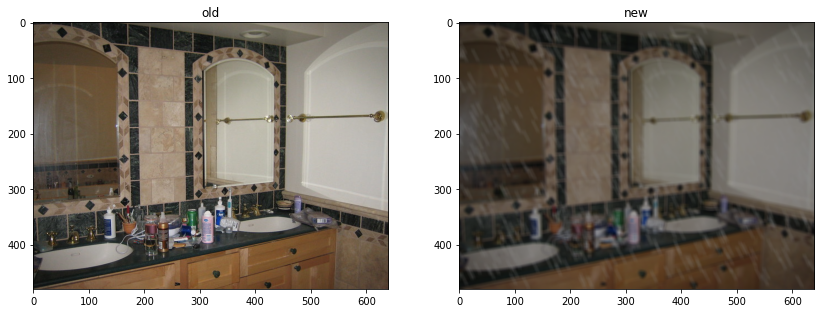

In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt


URL = "2468472978_b9091482ca_z.jpg"

image = cv2.imread(URL)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.RandomRain(p=1)
new_image = transform(image=image)["image"]

labs = ['old', 'new']
ims = [image, new_image]
plt.figure(figsize=(14, 8))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(labs[i])
    plt.imshow(ims[i])
plt.show()

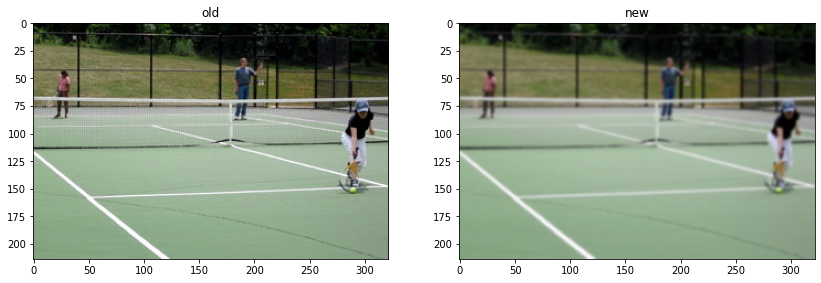

In [ ]:

URL = "3725283938_57303d748c_z.jpg"

image = cv2.imread(URL)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.GaussianBlur(p=1)
new_image = transform(image=image)["image"]

labs = ['old', 'new']
ims = [image, new_image]
plt.figure(figsize=(14, 8))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(labs[i])
    plt.imshow(ims[i])
plt.show()

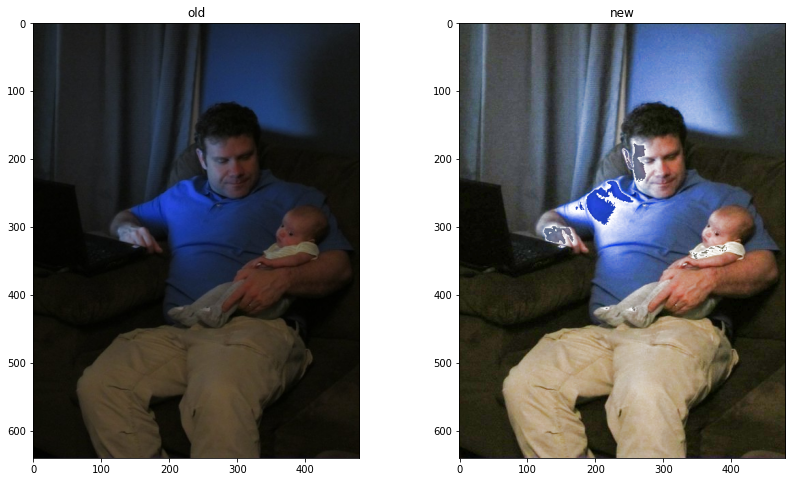

In [ ]:
URL = "7002959776_674c1ef99b_z.jpg"

image = cv2.imread(URL)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.RandomSnow(p=1)
new_image = transform(image=image)["image"]

labs = ['old', 'new']
ims = [image, new_image]
plt.figure(figsize=(14, 8))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(labs[i])
    plt.imshow(ims[i])
plt.show()